In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm
import scipy.stats as sps
sns.set()

In [30]:
# days with k homicides in UK
zeros = np.array([0] * 259)
ones = np.array([1] * 387)
twos = np.array([2] * 261)
threes = np.array([3] * 131)
fours = np.array([4] * 40)
fives = np.array([5] * 13)
six = np.array([6] * 3)

data = np.concatenate([zeros,ones,twos,threes,fours,fives,six])


In [31]:
data_mean = data.mean()
data_std = data.std()
print (data_mean)
print (data_std)

1.4122486288848264
1.171366125502726


In [32]:
samples = pm.rpoisson(data_mean,100000)

[24263 34545 24044 11654  4039  1134   262    49     9     1]
[ 0  1  2  3  4  5  6  7  8  9 10] [259 387 261 131  40  13   3   0   0   0]
[259 387 261 131  40  13   3   0   0   0]


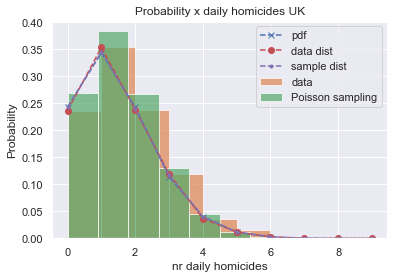

In [33]:
counts,bins = np.histogram(data,bins=range(0,11))
sample_counts,sample_bins=np.histogram(samples,bins=range(0,11))
print (sample_counts)
norm_sample_counts = sample_counts / sample_counts.sum()

x = range(7)
y = sps.poisson.pmf(x,data_mean)
plt.title('Probability x daily homicides UK')
plt.plot(x,y,'x--',label='pdf')
plt.hist(data,bins=6,density=True,alpha=0.7,label='data')
plt.hist(samples,bins=10,density=True,alpha=0.7,label='Poisson sampling')
print (bins,counts)
norm_counts = counts / counts.sum()
print (counts)
plt.plot(range(len(norm_counts)),norm_counts,'o--',label='data dist')
plt.plot(range(len(norm_sample_counts)),norm_sample_counts,'.--',label='sample dist')
plt.ylabel('Probability')
plt.xlabel('nr daily homicides')
plt.legend(loc='upper right')

In [34]:
scb = pd.read_csv('scb-dead_per_day.csv',sep=';',usecols=[1,2,3,4,5,6,7])
scb.index = pd.date_range('2020-01-01','2020-12-31')
#scb.drop(pd.Timestamp('2020-02-29'),inplace=True)
scb

,2015,2016,2017,2018,2019,2020,2015-2019
2020-01-01,295,245,339,275,300,254,291
2020-01-02,272,272,317,312,276,300,290
2020-01-03,281,293,310,295,271,256,290
2020-01-04,256,260,305,285,282,272,278
2020-01-05,268,260,304,291,275,265,280
...,...,...,...,...,...,...,...
2020-12-27,227,249,271,240,238,0,245
2020-12-28,274,262,273,261,215,0,257
2020-12-29,292,274,276,263,244,0,270
2020-12-30,283,307,275,232,226,0,265


In [35]:
deaths_ytd = scb.loc[:'2020-07-10'].sum()
deaths_ytd['2020'] - deaths_ytd['2015-2019']

3249

In [36]:
last_data_day = scb.loc[scb['2020'] == 0]
last_data_day = last_data_day.iloc[0].name
last_data_day = last_data_day - pd.DateOffset(days=1)
last_data_day

Timestamp('2020-07-10 00:00:00')

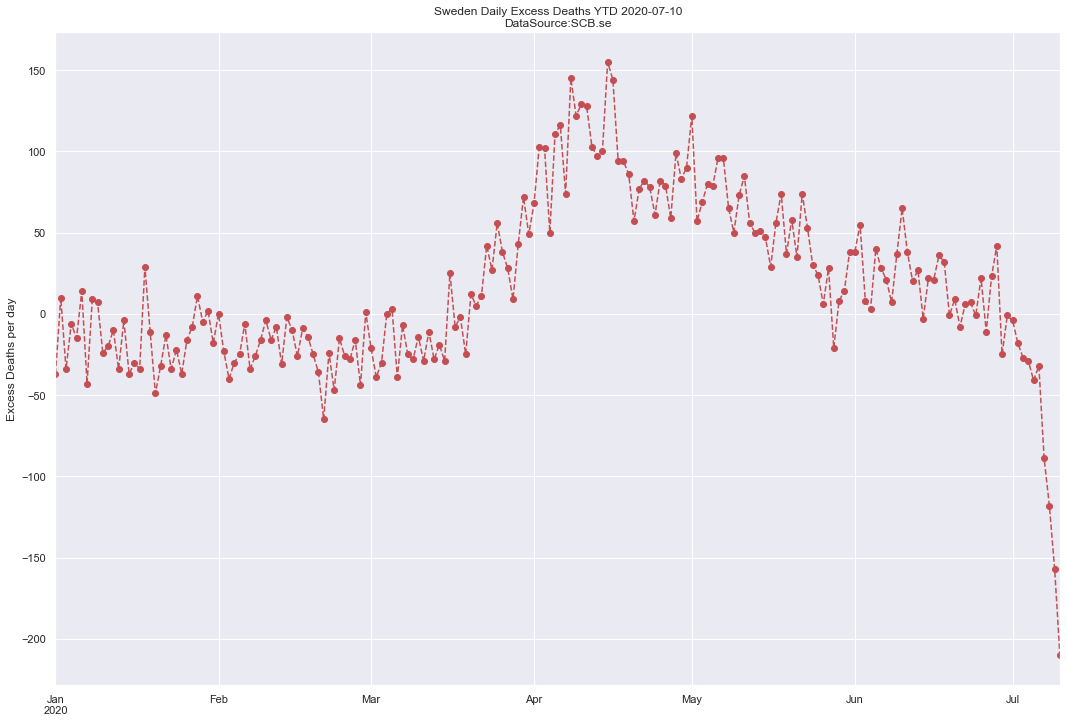

In [37]:
day_excess = scb['2020'][:last_data_day] - scb['2015-2019'][:last_data_day]
idx = day_excess.index.date
day_excess.plot(x=idx,figsize=(18,12),style='ro--',
               title='Sweden Daily Excess Deaths YTD {}\nDataSource:SCB.se'.format(last_data_day.date()))
plt.ylabel('Excess Deaths per day')

plt.savefig('scb_excess_deaths_per_day.jpg',format='jpg')

In [39]:
cumulative_until_last_day = scb[:last_data_day].sum()
cumulative_until_last_day['2020'] / cumulative_until_last_day['2015-2019']

1.0672559410449616

In [40]:
scb_weekly = scb.resample('W-TUE').sum()
print(scb_weekly.loc[:last_data_day].sum())
(scb_weekly.loc[:last_data_day,'2020'] - scb_weekly.loc[:last_data_day,'2015-2019']).sum()

2015         48802
2016         46711
2017         48225
2018         48426
2019         45185
2020         51400
2015-2019    47666
dtype: int64


3734

In [41]:
scb_weekly

,2015,2016,2017,2018,2019,2020,2015-2019
2020-01-07,1937,1846,2192,1998,1965,1878,1989
2020-01-14,1954,1904,2109,1941,1802,1867,1943
2020-01-21,1937,1969,2088,1945,1832,1791,1955
2020-01-28,1929,1977,1922,1928,1807,1794,1913
2020-02-04,1966,1931,1913,1854,1871,1794,1908
2020-02-11,1918,1913,1833,1983,1847,1772,1899
2020-02-18,2050,1783,2004,2024,1754,1823,1923
2020-02-25,2149,1874,2071,2116,1850,1774,2012
2020-03-03,1743,1806,1751,1877,1494,1751,1928
2020-03-10,2028,1897,1873,2221,1690,1831,1941


In [45]:
scb_weekly['excess'] = scb_weekly['2020'] - scb_weekly['2015-2019']
scb_weekly['cumexcess'] = scb_weekly['excess'].cumsum()
scb_weekly

,2015,2016,2017,2018,2019,2020,2015-2019,excess,cumexcess
2020-01-07,1937,1846,2192,1998,1965,1878,1989,-111,-111
2020-01-14,1954,1904,2109,1941,1802,1867,1943,-76,-187
2020-01-21,1937,1969,2088,1945,1832,1791,1955,-164,-351
2020-01-28,1929,1977,1922,1928,1807,1794,1913,-119,-470
2020-02-04,1966,1931,1913,1854,1871,1794,1908,-114,-584
2020-02-11,1918,1913,1833,1983,1847,1772,1899,-127,-711
2020-02-18,2050,1783,2004,2024,1754,1823,1923,-100,-811
2020-02-25,2149,1874,2071,2116,1850,1774,2012,-238,-1049
2020-03-03,1743,1806,1751,1877,1494,1751,1928,-177,-1226
2020-03-10,2028,1897,1873,2221,1690,1831,1941,-110,-1336


In [13]:
scb_monthly = scb.resample('M').sum()
scb_monthly['delta'] = scb_monthly['2020'] - scb_monthly['2015-2019']
scb_monthly['cumdelta'] = (scb_monthly['delta'].cumsum())
# last of feb not correct for delta - leap year
scb_monthly

,2015,2016,2017,2018,2019,2020,2015-2019,delta,cumdelta
2020-01-31,8637,8548,9101,8578,8174,8120,8611,-491,-491
2020-02-29,8067,7672,7875,8151,7294,7362,8007,-645,-1136
2020-03-31,8619,8009,8076,9210,7570,8362,8296,66,-1070
2020-04-30,7694,7406,7566,7615,7186,10362,7494,2868,1798
2020-05-31,7311,6991,7332,6778,6972,8694,7075,1619,3417
2020-06-30,6767,6542,6655,6499,6452,7141,6584,557,3974
2020-07-31,7036,7084,6778,7259,6723,1516,6973,-5457,-1483
2020-08-31,6712,7005,6824,6791,6829,0,6831,-6831,-8314
2020-09-30,6916,6728,6762,6803,6674,0,6776,-6776,-15090
2020-10-31,7147,7357,7415,7276,7338,0,7309,-7309,-22399


In [14]:
data = scb_weekly.iloc[:,0:5]
#data = data.iloc[:9]
data.mean(axis=1)
data

,2015,2016,2017,2018,2019
2020-01-07,1937,1846,2192,1998,1965
2020-01-14,1954,1904,2109,1941,1802
2020-01-21,1937,1969,2088,1945,1832
2020-01-28,1929,1977,1922,1928,1807
2020-02-04,1966,1931,1913,1854,1871
2020-02-11,1918,1913,1833,1983,1847
2020-02-18,2050,1783,2004,2024,1754
2020-02-25,2149,1874,2071,2116,1850
2020-03-03,1743,1806,1751,1877,1494
2020-03-10,2028,1897,1873,2221,1690


In [15]:
data_min = data.min(axis=1)
data_max = data.max(axis=1)

print (data.mean().mean())

1677.4716981132074


[1.24535295e-02 4.84435735e+02 1.17206971e+03 2.32681811e+03
 2.10654707e+04]


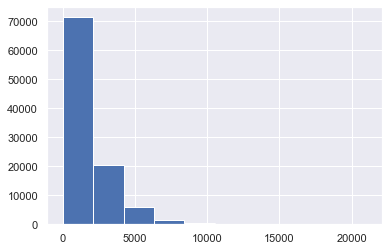

In [16]:
test_lambda = pm.rexponential(1/ data.mean().mean(),100000)
plt.hist(test_lambda)
print (np.percentile(test_lambda,[0,25,50,75,100]))

In [17]:
walk = 50000
burnin = 20000
thin = 2


res_array = np.zeros((len(data),3))
dist_array = np.zeros((len(data),(walk - burnin) // thin))

for i in range(len(data)):
    print ('\n++++++++++++++++++++ processing day ++++++++++++++++++++', i)
    print (data.iloc[i,:])
    print (data.iloc[i,:].mean())
    
    lambda_ = pm.Exponential('lambda',1/ data.iloc[i,:].mean())
    lkh  = pm.Poisson('lkh',lambda_,observed=True,value=data.iloc[i,:])
    model = pm.Model([lambda_,lkh])
    mcmc = pm.MCMC(model)
    sample = mcmc.sample(walk,burnin,thin)
    post = mcmc.trace(lambda_)[:]   
        
    res_array[i,0] = post.min()
    res_array[i,1] = post.mean()
    res_array[i,2] = post.max()
    
    dist_array[i,:] = post
                     
    


++++++++++++++++++++ processing day ++++++++++++++++++++ 0
2015    1937
2016    1846
2017    2192
2018    1998
2019    1965
Name: 2020-01-07 00:00:00, dtype: int64
1987.6
 [-----------------100%-----------------] 50000 of 50000 complete in 3.9 sec
++++++++++++++++++++ processing day ++++++++++++++++++++ 1
2015    1954
2016    1904
2017    2109
2018    1941
2019    1802
Name: 2020-01-14 00:00:00, dtype: int64
1942.0
 [-----------------100%-----------------] 50000 of 50000 complete in 2.4 sec
++++++++++++++++++++ processing day ++++++++++++++++++++ 2
2015    1937
2016    1969
2017    2088
2018    1945
2019    1832
Name: 2020-01-21 00:00:00, dtype: int64
1954.2
 [-----------------100%-----------------] 50000 of 50000 complete in 2.1 sec
++++++++++++++++++++ processing day ++++++++++++++++++++ 3
2015    1929
2016    1977
2017    1922
2018    1928
2019    1807
Name: 2020-01-28 00:00:00, dtype: int64
1912.6
 [-----------------100%-----------------] 50000 of 50000 complete in 2.3 sec
+++++++

In [18]:
dist_array

array([[1983.06799608, 1983.06799608, 1983.06799608, ..., 1975.68755178,
        1975.68755178, 1989.80041554],
       [1958.85610242, 1898.32171654, 1898.32171654, ..., 1971.88033182,
        1971.88033182, 1971.88033182],
       [1950.22830786, 1953.67035141, 1995.33382463, ..., 1928.06337586,
        1928.06337586, 1928.06337586],
       ...,
       [1786.92814566, 1786.92814566, 1786.92814566, ..., 1766.6314395 ,
        1744.34417952, 1768.70153816],
       [1836.12601684, 1836.12601684, 1836.12601684, ..., 1829.76029396,
        1829.76029396, 1829.76029396],
       [ 542.1717459 ,  542.1717459 ,  525.17680057, ...,  535.38046221,
         535.38046221,  538.49676014]])

In [19]:
N = 1000

lambdas_per_week = np.zeros((len(dist_array),N))
samples_per_week = np.zeros((len(dist_array),N))

for week in range(len(dist_array)):
    lambdas_per_week[week] = np.random.choice(dist_array[week],replace=True,size=N)
    samples_per_week[week] = pm.rpoisson(lambdas_per_week[week],size=N)

In [20]:
print (lambdas_per_week[:5])
samples_per_week[:5]

[[1961.31859516 2001.64865613 1986.19072233 ... 2012.65298025
  1996.60374369 1997.11832233]
 [1928.64923115 1941.72062173 1966.6813156  ... 1955.48932472
  1941.5517871  1943.20720653]
 [1919.36561628 1961.17971567 2000.27910039 ... 1957.4135826
  1931.62696911 1952.53951394]
 [1903.13345877 1881.775681   1928.69218059 ... 1915.32783872
  1923.42691428 1933.97638208]
 [1912.65401531 1918.38059132 1953.16644941 ... 1901.32728387
  1928.18260383 1901.32264051]]


array([[1940., 1958., 1972., ..., 2016., 2061., 2031.],
       [1919., 1933., 1972., ..., 1929., 1986., 1889.],
       [1907., 2001., 2030., ..., 1960., 1934., 1967.],
       [1916., 1798., 1891., ..., 1958., 1921., 1981.],
       [1934., 1885., 1906., ..., 1869., 1911., 1983.]])

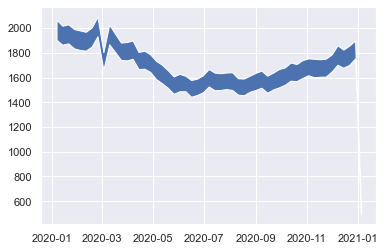

In [21]:
ci_samples = np.percentile(samples_per_week,[5.5,94.5],axis=1)
ci_samples

plt.fill_between(scb_weekly.index,ci_samples[0],ci_samples[1])

In [22]:
res_array

array([[1915.25851262, 1987.68974091, 2085.94669733],
       [1870.12412212, 1942.30178552, 2013.81179178],
       [1883.51661501, 1954.51882558, 2037.25224593],
       [1841.07602542, 1912.74683072, 1983.26252735],
       [1831.84827954, 1907.27268611, 1985.04759053],
       [1828.51603762, 1898.87783208, 1987.19406352],
       [1837.89773411, 1923.02517337, 1998.12977931],
       [1926.32126429, 2012.38229367, 2091.78776955],
       [1667.82022929, 1734.71959911, 1803.04463527],
       [1860.91096221, 1942.02610565, 2014.39012929],
       [1799.5989249 , 1880.58213131, 1964.49185502],
       [1735.68275848, 1812.56104035, 1888.5814554 ],
       [1741.74098422, 1809.80996852, 1879.14616423],
       [1747.91938119, 1822.65856735, 1921.41489781],
       [1668.1717318 , 1736.62198199, 1811.34611493],
       [1671.88775167, 1747.45654675, 1816.92815478],
       [1649.05163551, 1718.39156542, 1798.71725276],
       [1590.46920058, 1662.47511903, 1732.75354369],
       [1558.71061452, 1628.

In [23]:
errors_low = np.abs(res_array[:,1] - res_array[:,0])
errors_low = errors_low[:-1]
errors_high = np.abs(res_array[:,1] - res_array[:,2]) 
errors_high = errors_high[:-1]
print (errors_low)
print (errors_high)

errors = np.array((errors_low,errors_high))
errors

[72.43122829 72.1776634  71.00221057 71.6708053  75.42440656 70.36179445
 85.12743926 86.06102938 66.89936981 81.11514343 80.98320641 76.87828187
 68.06898429 74.73918616 68.45025018 75.56879508 69.3399299  72.00591845
 69.90911811 68.31994447 64.70590955 71.12664805 62.64790048 63.43360848
 76.81106049 77.57041922 71.02167299 66.56185725 62.692208   76.71772852
 65.16423394 62.48060535 65.79868197 68.94751994 68.08488667 79.71167876
 67.49452878 69.4316938  73.04605923 66.67386532 71.39089638 68.051633
 62.46869565 73.51847722 66.74010746 63.01999912 73.27275171 75.9688641
 76.40334744 71.32748908 74.800313   71.11950842]
[98.25695642 71.51000626 82.73342034 70.51569663 77.77490442 88.31623145
 75.10460594 79.40547587 68.32503617 72.36402365 83.90972371 76.02041505
 69.33619572 98.75633046 74.72413295 69.47160803 80.32568735 70.27842466
 68.95802346 79.48506732 75.49518538 61.12743918 72.73744637 78.69560036
 62.1323965  75.0214938  67.6219116  82.30261777 64.68347339 68.70179089
 67.

array([[72.43122829, 72.1776634 , 71.00221057, 71.6708053 , 75.42440656,
        70.36179445, 85.12743926, 86.06102938, 66.89936981, 81.11514343,
        80.98320641, 76.87828187, 68.06898429, 74.73918616, 68.45025018,
        75.56879508, 69.3399299 , 72.00591845, 69.90911811, 68.31994447,
        64.70590955, 71.12664805, 62.64790048, 63.43360848, 76.81106049,
        77.57041922, 71.02167299, 66.56185725, 62.692208  , 76.71772852,
        65.16423394, 62.48060535, 65.79868197, 68.94751994, 68.08488667,
        79.71167876, 67.49452878, 69.4316938 , 73.04605923, 66.67386532,
        71.39089638, 68.051633  , 62.46869565, 73.51847722, 66.74010746,
        63.01999912, 73.27275171, 75.9688641 , 76.40334744, 71.32748908,
        74.800313  , 71.11950842],
       [98.25695642, 71.51000626, 82.73342034, 70.51569663, 77.77490442,
        88.31623145, 75.10460594, 79.40547587, 68.32503617, 72.36402365,
        83.90972371, 76.02041505, 69.33619572, 98.75633046, 74.72413295,
        69.47160

2020-01-07   -111
2020-01-14    -76
2020-01-21   -164
2020-01-28   -119
2020-02-04   -114
2020-02-11   -127
2020-02-18   -100
2020-02-25   -238
2020-03-03   -177
2020-03-10   -110
2020-03-17    -99
2020-03-24     70
2020-03-31    295
2020-04-07    624
2020-04-14    824
2020-04-21    707
2020-04-28    540
2020-05-05    580
2020-05-12    521
2020-05-19    344
2020-05-26    280
2020-06-02    160
2020-06-09    144
2020-06-16    190
2020-06-23     81
2020-06-30     49
2020-07-07   -240
Freq: W-TUE, dtype: int64
2020-01-07    -111
2020-01-14    -187
2020-01-21    -351
2020-01-28    -470
2020-02-04    -584
2020-02-11    -711
2020-02-18    -811
2020-02-25   -1049
2020-03-03   -1226
2020-03-10   -1336
2020-03-17   -1435
2020-03-24   -1365
2020-03-31   -1070
2020-04-07    -446
2020-04-14     378
2020-04-21    1085
2020-04-28    1625
2020-05-05    2205
2020-05-12    2726
2020-05-19    3070
2020-05-26    3350
2020-06-02    3510
2020-06-09    3654
2020-06-16    3844
2020-06-23    3925
2020-06-30   

Text(0, 0.5, 'Number of Excess Deaths')

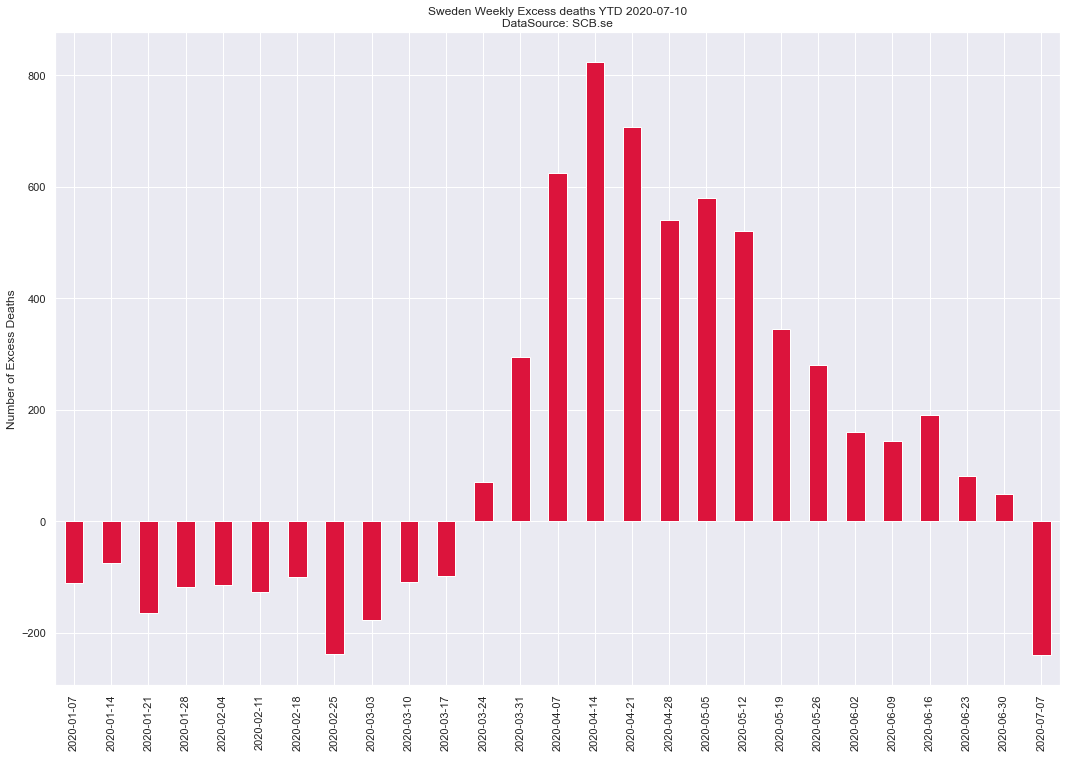

In [24]:

excess = scb_weekly.loc[:last_data_day,'2020'] - scb_weekly.loc[:last_data_day,'2015-2019']
print (excess)
current_excess = excess.cumsum()
print (current_excess)
excess.index = excess.index.date
excess.plot.bar(x=excess.index,title='Sweden Weekly Excess deaths YTD {}\nDataSource: SCB.se'.format(last_data_day.date()),
                y=excess,
                figsize=(18,12),
                color='crimson')

plt.ylabel('Number of Excess Deaths')

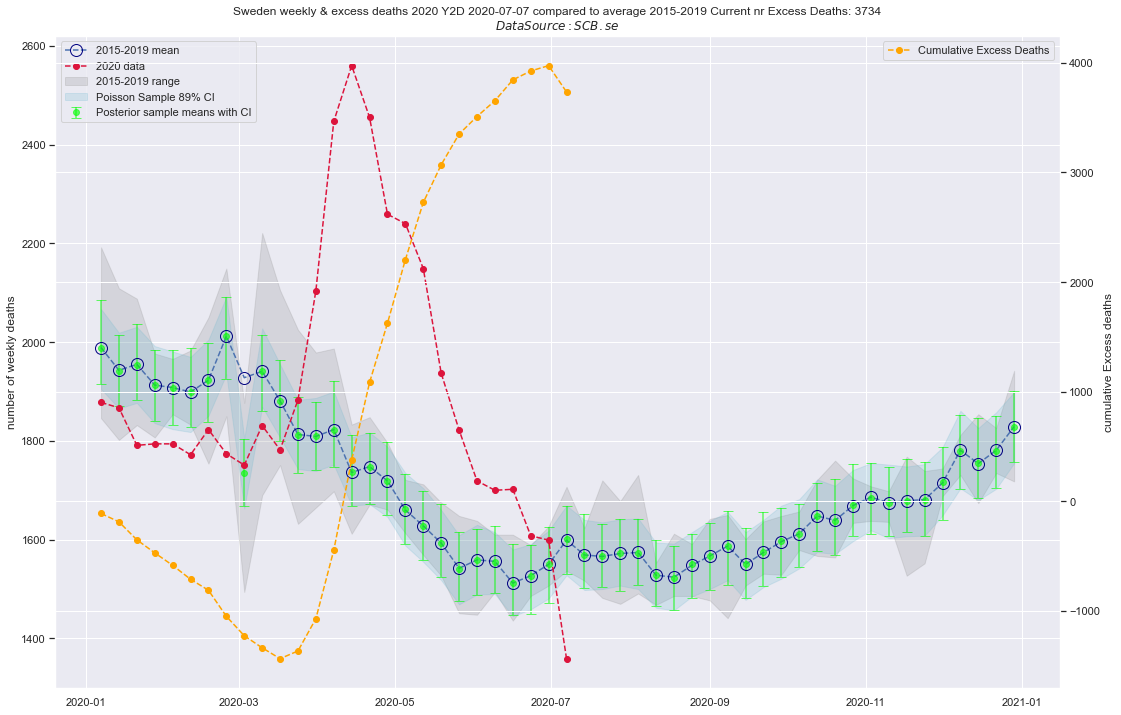

In [29]:
plt.figure(figsize=(18,12))
plt.title('Sweden weekly & excess deaths 2020 Y2D '\
          '{} compared to average 2015-2019 Current nr Excess Deaths: {}\n$Data Source: SCB.se$'.format(
    excess.index[-1],current_excess[-1]))
ax = plt.gca()
ax2 = plt.twinx()

ax.errorbar(scb_weekly.index[:len(data) - 1],res_array[:-1,1],yerr=errors,
             fmt='o',capsize=5,color='lime',alpha=0.6,label='Posterior sample means with CI')

ax.plot(scb_weekly.index[:len(data) -1],scb_weekly['2015-2019'][:-1],'o--',
        markerfacecolor='none',markeredgecolor='navy',markersize=12,
        label='2015-2019 mean')

ax.plot(scb_weekly[:last_data_day].index,scb_weekly.loc[:last_data_day,'2020'],'o--',
         color='crimson',label='2020 data')

ax.fill_between(scb_weekly.index[:len(data) -1],y1=data_min[:-1],y2=data_max[:-1],color='grey',
                 alpha=0.2,label='2015-2019 range')

ax.fill_between(scb_weekly.index[:len(data) -1],y1=ci_samples[0][:-1],y2=ci_samples[1][:-1],color='c',
                 alpha=0.2,label='Poisson Sample 89% CI')



ax2.plot(excess.index,excess.cumsum(),'o--',ls='dashed',color='orange',label='Cumulative Excess Deaths')
ax.set_ylabel('number of weekly deaths')
ax2.set_ylabel('cumulative Excess deaths')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.savefig('scb_poisson_weekly.jpg',format='jpg')

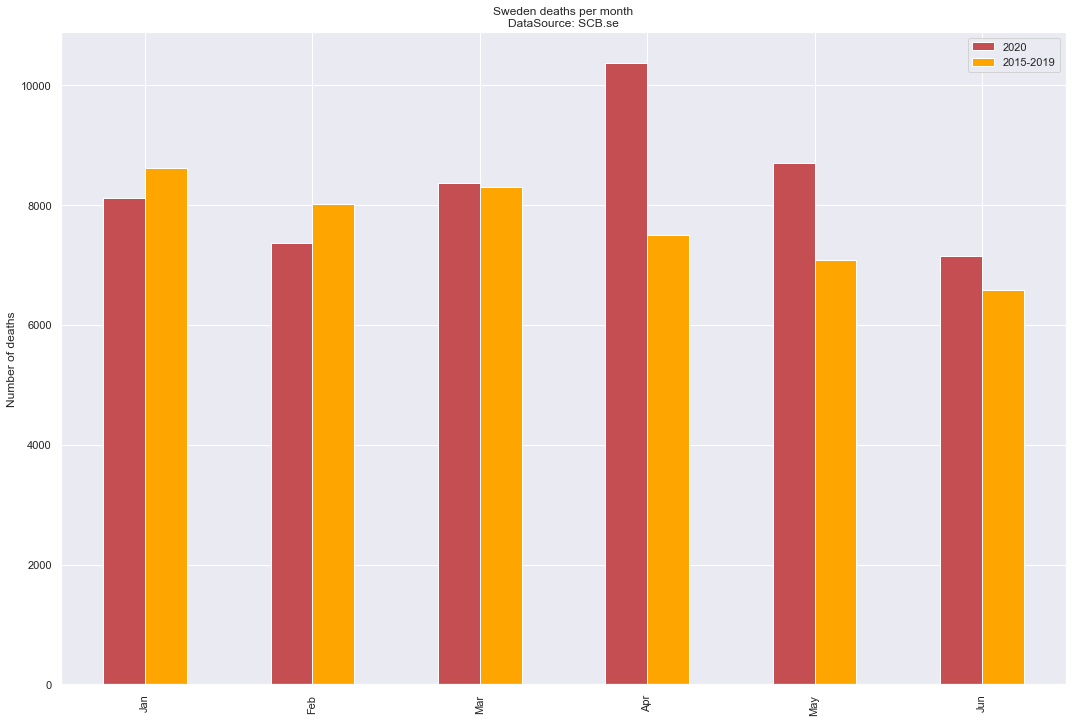

In [26]:
#scb_monthly.index = scb_monthly.index.date
scb_monthly[['2020','2015-2019']][:pd.Timestamp('2020-06-30')].plot.bar(color=['r','orange'],
                                                                        title='Sweden deaths per month\nDataSource: SCB.se',figsize=(18,12))
plt.ylabel('Number of deaths')
plt.xticks(range(len(scb_monthly[:pd.Timestamp('2020-06-30')])),['Jan','Feb','Mar','Apr','May','Jun'])
plt.savefig('scb_monthly_deaths.jpg',format='jpg')